In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv("heart.csv")
print(dataset.columns)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X)
print(y)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]
[0 0 0 ... 0 1 0]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0 )
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [13]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1]


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 99  24]
 [ 12 122]]


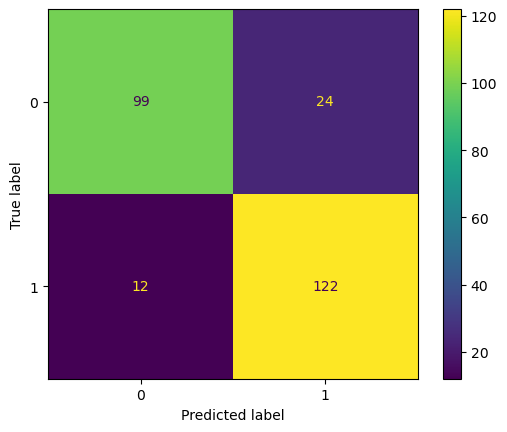

In [17]:
classes= dataset['target'].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [19]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))


0.8599221789883269


In [21]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.80      0.85       123
           1       0.84      0.91      0.87       134

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257



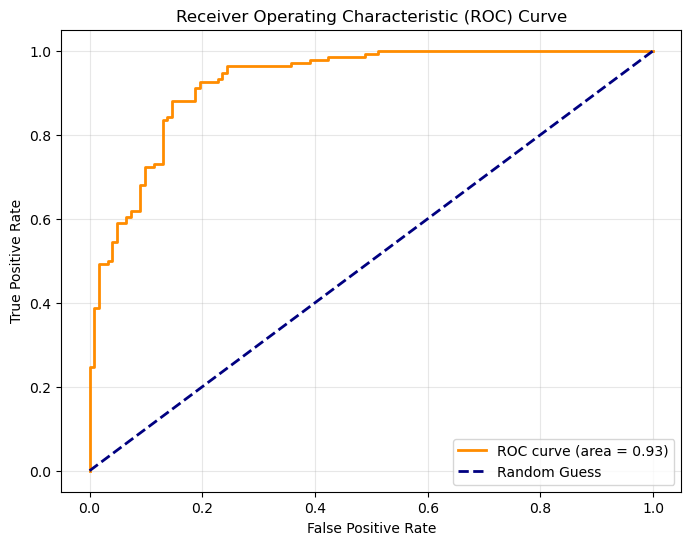

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = classifier.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()